In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
import category_encoders as ce
import plotly.graph_objs as go
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble  import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from keras.layers import Dense, Dropout, LSTM, Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn.metrics import confusion_matrix 
import seaborn as sn
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [3]:
dataset=pd.read_csv('heart.csv')
df=dataset

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
count=0;
male=0;
for i in range (0,303):
    if df['sex'][i]==0 and df['target'][i]==1:
        count=count+1
        male=male+1
    elif df['sex'][i]==0:
        male=male+1
print(count)
print(male)
print("male percentage:")
print(count/male*100)

72
96
male percentage:
75.0


In [6]:
count=0;
male=0;
for i in range (0,303):
    if df['sex'][i]==1 and df['target'][i]==1:
        count=count+1
        male=male+1
    elif df['sex'][i]==0:
        male=male+1
print(count)
print(male)
print("female percentage:")
print(count/male*100)

93
189
female percentage:
49.2063492063492


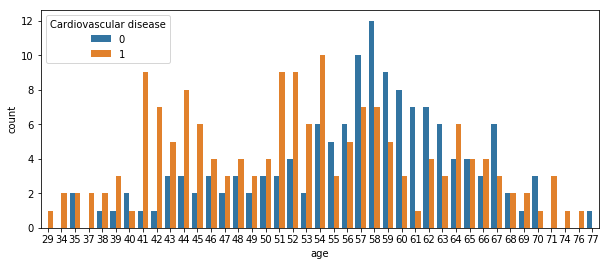

In [7]:
plt.figure(figsize=(10,4))
plt.legend(['yes', 'no'],loc='upper left')
g = sn.countplot(data = dataset, x = 'age', hue = 'target')
g.legend(title = 'Cardiovascular disease', loc='upper left', ncol=1)

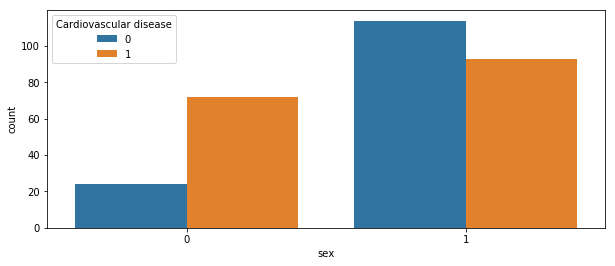

In [8]:
plt.figure(figsize=(10,4))
plt.legend(loc='upper left')
g = sn.countplot(data = dataset, x = 'sex', hue = 'target')
g.legend(title = 'Cardiovascular disease', loc='upper left', ncol=1)

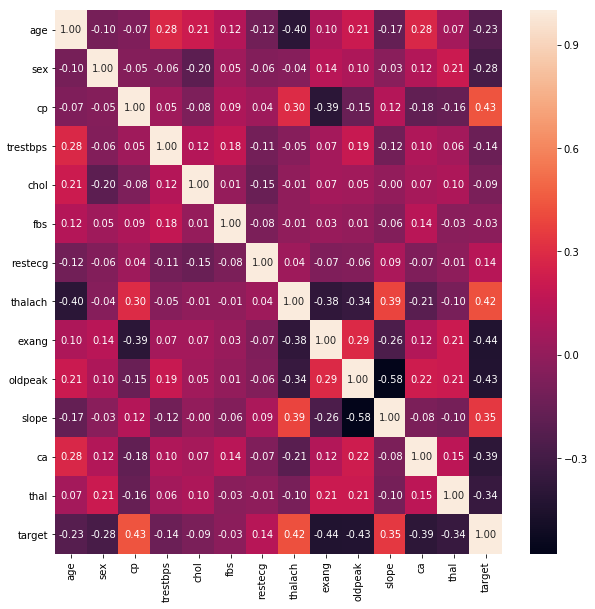

In [9]:
fig= plt.figure(figsize=(10,10))
sn.heatmap(df.corr(), annot=True,fmt=".2f")
plt.show()

In [10]:
X = df.iloc[:, 0:13].values
y = df.iloc[:,13].values

In [11]:
df.std()

age          9.082101
sex          0.466011
cp           1.032052
trestbps    17.538143
chol        51.830751
fbs          0.356198
restecg      0.525860
thalach     22.905161
exang        0.469794
oldpeak      1.161075
slope        0.616226
ca           1.022606
thal         0.612277
target       0.498835
dtype: float64

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
newdata=[]

 N= 1, Accuracy 78.95%
 N= 2, Accuracy 77.63%
 N= 3, Accuracy 84.21%
 N= 4, Accuracy 84.21%
 N= 5, Accuracy 81.58%
 N= 6, Accuracy 85.53%
 N= 7, Accuracy 86.84%
 N= 8, Accuracy 86.84%
 N= 9, Accuracy 85.53%
 N= 10, Accuracy 85.53%
 N= 11, Accuracy 84.21%
 N= 12, Accuracy 84.21%
 N= 13, Accuracy 82.89%
 N= 14, Accuracy 82.89%
 N= 15, Accuracy 82.89%
 N= 16, Accuracy 81.58%
 N= 17, Accuracy 82.89%
 N= 18, Accuracy 81.58%
 N= 19, Accuracy 81.58%
 N= 20, Accuracy 81.58%


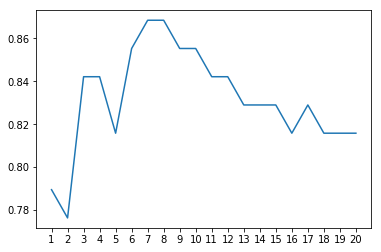

In [15]:
from sklearn.neighbors import KNeighborsClassifier
accuracy=[]
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred_knn))
    print(" N= {}, Accuracy {:.2f}%".format(i,accuracy_score(y_test, y_pred_knn)*100))
   
plt.plot(range(1,21),accuracy)
plt.xticks(np.arange(1,21,1))
plt.show()

In [16]:
knn = KNeighborsClassifier(n_neighbors = 7)  # n_neighbors means k
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNNClassifier")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_knn)*100))
print(classification_report(y_test, y_pred_knn))

KNNClassifier
Accuracy: 86.84%
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.85      0.93      0.89        43

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.86        76
weighted avg       0.87      0.87      0.87        76



In [17]:
from sklearn.ensemble  import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)  
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)
print("RandomForestClassifier")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_RF)*100))
print(classification_report(y_test, y_pred_RF))

RandomForestClassifier
Accuracy: 85.53%
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.83      0.93      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.84      0.85        76
weighted avg       0.86      0.86      0.85        76



In [18]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier= DecisionTreeClassifier(criterion='entropy')
dtclassifier.fit(X_train,y_train)
y_pred_DT = dtclassifier.predict(X_test)
print("DecisionTreeClassifier")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_DT)*100))
print(classification_report(y_test, y_pred_DT))

DecisionTreeClassifier
Accuracy: 77.63%
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        33
           1       0.81      0.79      0.80        43

    accuracy                           0.78        76
   macro avg       0.77      0.77      0.77        76
weighted avg       0.78      0.78      0.78        76



In [19]:
from sklearn.naive_bayes import GaussianNB
nbclassifier=GaussianNB()
nbclassifier.fit(X_train, y_train)
nb_y_pred = nbclassifier.predict(X_test)
print("GaussianNB")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, nb_y_pred)*100))
print(classification_report(y_test, nb_y_pred))

GaussianNB
Accuracy: 82.89%
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.81      0.91      0.86        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



In [20]:
svmkclassifier =SVC(kernel ='rbf',random_state=0,gamma='auto')
svmkclassifier.fit(X_train, y_train)
y_pred_SVMK = svmkclassifier.predict(X_test)
print("svmkclassifier")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_SVMK)*100))
print(classification_report(y_test, y_pred_SVMK))

svmkclassifier
Accuracy: 85.53%
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.83      0.93      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.84      0.85        76
weighted avg       0.86      0.86      0.85        76



In [21]:
bg=BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=15)
bg.fit(X_train, y_train)
y_pred_bg = bg.predict(X_test)
print("BaggingClassifier")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_bg)*100))
print(classification_report(y_test, y_pred_bg))

BaggingClassifier
Accuracy: 82.89%
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.81      0.91      0.86        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



In [22]:
et=ExtraTreesClassifier(n_estimators=100, max_features=4)
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)
print("ExtraTreesClassifier")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_et)*100))
print(classification_report(y_test, y_pred_et))

ExtraTreesClassifier
Accuracy: 82.89%
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        33
           1       0.83      0.88      0.85        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



In [23]:
adb=AdaBoostClassifier(n_estimators=50, random_state=4)
adb.fit(X_train, y_train)
y_pred_adb = adb.predict(X_test)
print("AdaBoostClassifier")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_adb)*100))
print(classification_report(y_test, y_pred_adb))

AdaBoostClassifier
Accuracy: 84.21%
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        33
           1       0.84      0.88      0.86        43

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [24]:
gb=GradientBoostingClassifier(n_estimators=1000, random_state=4)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("GradientBoostingClassifier")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_gb)*100))
print(classification_report(y_test, y_pred_gb))

GradientBoostingClassifier
Accuracy: 81.58%
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        33
           1       0.87      0.79      0.83        43

    accuracy                           0.82        76
   macro avg       0.81      0.82      0.81        76
weighted avg       0.82      0.82      0.82        76



In [25]:
newdata=pd.DataFrame({"knn":y_pred_knn,"rf":y_pred_RF,"GB":y_pred_gb,"ADB":y_pred_adb,"ET":y_pred_et,"BG":y_pred_bg,"SVM":y_pred_SVMK,"nb":nb_y_pred,"DT":y_pred_DT})

In [26]:
print(newdata)

    knn  rf  GB  ADB  ET  BG  SVM  nb  DT
0     0   0   0    0   0   0    0   0   0
1     1   1   1    1   0   1    1   1   1
2     0   1   1    1   1   1    1   1   1
3     0   0   0    0   0   0    0   0   0
4     0   0   0    0   0   0    0   0   1
..  ...  ..  ..  ...  ..  ..  ...  ..  ..
71    1   1   1    1   1   1    1   1   1
72    1   1   1    1   1   1    1   1   1
73    0   0   0    0   0   0    0   0   0
74    0   0   0    0   0   0    0   0   0
75    1   1   0    1   0   1    1   1   0

[76 rows x 9 columns]


In [27]:
x_test=X_test.reshape(76,13,1)
x_train=X_train.reshape(227,13,1)
X_test1=X_test
X_train1=X_train
y_test1=y_test
y_train1=y_train

In [28]:
X_train, X_test, y_train, y_test = train_test_split(newdata, y_test, test_size = 0.25, random_state = 0)

In [29]:
from sklearn.ensemble  import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)  
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)
print("RandomForestClassifier  with secondary data")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_RF)*100))
print(classification_report(y_test, y_pred_RF))

RandomForestClassifier  with secondary data
Accuracy: 84.21%
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.86      0.92      0.89        13

    accuracy                           0.84        19
   macro avg       0.83      0.79      0.81        19
weighted avg       0.84      0.84      0.84        19



In [30]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier= DecisionTreeClassifier(criterion='entropy')
dtclassifier.fit(X_train,y_train)
y_pred_DT = dtclassifier.predict(X_test)
print("DecisionTreeClassifier  with secondary data")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_DT)*100))
print(classification_report(y_test, y_pred_DT))

DecisionTreeClassifier  with secondary data
Accuracy: 84.21%
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.86      0.92      0.89        13

    accuracy                           0.84        19
   macro avg       0.83      0.79      0.81        19
weighted avg       0.84      0.84      0.84        19



In [31]:
from sklearn.naive_bayes import GaussianNB
nbclassifier=GaussianNB()
nbclassifier.fit(X_train, y_train)
nb_y_pred = nbclassifier.predict(X_test)
print("GaussianNB  with secondary data")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, nb_y_pred)*100))
print(classification_report(y_test, nb_y_pred))

GaussianNB  with secondary data
Accuracy: 94.74%
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.93      1.00      0.96        13

    accuracy                           0.95        19
   macro avg       0.96      0.92      0.94        19
weighted avg       0.95      0.95      0.95        19



In [32]:
svmkclassifier =SVC(kernel ='rbf',random_state=0,gamma='auto')
svmkclassifier.fit(X_train, y_train)
y_pred_SVMK = svmkclassifier.predict(X_test)
print("svmkclassifier  with secondary data")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_SVMK)*100))
print(classification_report(y_test, y_pred_SVMK))
print( confusion_matrix(y_test, y_pred_SVMK))

svmkclassifier  with secondary data
Accuracy: 94.74%
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.93      1.00      0.96        13

    accuracy                           0.95        19
   macro avg       0.96      0.92      0.94        19
weighted avg       0.95      0.95      0.95        19

[[ 5  1]
 [ 0 13]]


In [33]:
bg=BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=15)
bg.fit(X_train, y_train)
y_pred_bg = bg.predict(X_test)
print("BaggingClassifier  with secondary data")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_bg)*100))
print(classification_report(y_test, y_pred_bg))

BaggingClassifier  with secondary data
Accuracy: 84.21%
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.86      0.92      0.89        13

    accuracy                           0.84        19
   macro avg       0.83      0.79      0.81        19
weighted avg       0.84      0.84      0.84        19



In [34]:
et=ExtraTreesClassifier(n_estimators=100, max_features=4)
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)
print("ExtraTreesClassifier  with secondary data")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_et)*100))
print(classification_report(y_test, y_pred_et))

ExtraTreesClassifier  with secondary data
Accuracy: 84.21%
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.86      0.92      0.89        13

    accuracy                           0.84        19
   macro avg       0.83      0.79      0.81        19
weighted avg       0.84      0.84      0.84        19



In [35]:
adb=AdaBoostClassifier(n_estimators=50, random_state=4)
adb.fit(X_train, y_train)
y_pred_adb = adb.predict(X_test)
print("AdaBoostClassifier with secondary data")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_adb)*100))
print(classification_report(y_test, y_pred_adb))

AdaBoostClassifier with secondary data
Accuracy: 84.21%
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.86      0.92      0.89        13

    accuracy                           0.84        19
   macro avg       0.83      0.79      0.81        19
weighted avg       0.84      0.84      0.84        19



In [36]:
gb=GradientBoostingClassifier(n_estimators=1000, random_state=4)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("GradientBoostingClassifier with secondary data")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_gb)*100))
print(classification_report(y_test, y_pred_gb))

GradientBoostingClassifier with secondary data
Accuracy: 89.47%
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.87      1.00      0.93        13

    accuracy                           0.89        19
   macro avg       0.93      0.83      0.86        19
weighted avg       0.91      0.89      0.89        19



In [37]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.5, decay=1e-6, momentum=0.9, nesterov=True)
lstm = Sequential()
lstm.add(LSTM(output_dim=256, activation='sigmoid', inner_activation='hard_sigmoid', return_sequences=True))
lstm.add(Dropout(0.3))
lstm.add(LSTM(output_dim=256, activation='sigmoid', inner_activation='hard_sigmoid'))
lstm.add(Dropout(0.3))
lstm.add(Dense(1, activation='sigmoid'))
lstm.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
lstm.fit(x_train,y_train1,batch_size=10, nb_epoch=100, validation_data=(x_test, y_test1), verbose = 1)
y_pred_lstm=lstm.predict(x_test)
for i in range (0,76):
    if y_pred_lstm[i] > .53:
        y_pred_lstm[i]=1
    else:
        y_pred_lstm[i]=0
print(accuracy_score(y_test1, y_pred_lstm))
print("lstm")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test1, y_pred_lstm)*100))
print( confusion_matrix(y_test1, y_pred_lstm))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning:

Update your `LSTM` call to the Keras 2 API: `LSTM(activation="sigmoid", return_sequences=True, units=256, recurrent_activation="hard_sigmoid")`

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning:

Update your `LSTM` call to the Keras 2 API: `LSTM(activation="sigmoid", units=256, recurrent_activation="hard_sigmoid")`

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 227 samples, validate on 76 samples
Epoch 1/100
227/227 [==============================] - 3s 13ms/step - loss: 0.7581 - accuracy: 0.5154 - val_loss: 0.7353 - val_accuracy: 0.5658
Epoch 2/100
227/227 [==============================] - 1s 6ms/step - loss: 0.7138 - accuracy: 0.5198 - val_loss: 0.7199 - val_accuracy: 0.5658
Epoch 3/100
227/227 [==============================] - 1s 6ms/step - loss: 0.7344 - accuracy: 0.4714 - val_loss: 0.6945 - val_accuracy: 0.4342
Epoch 4/100
227/227 [==============================] - 1s 6ms/step - loss: 0.7177 - accuracy: 0.4802 - val_loss: 0.6884 - val_accuracy: 0.5263
Epoch 5/100
227/227 [==============================] - 1s 6ms/step - loss: 0.7159 - accuracy: 0.4846 - val_loss: 0.6788 - val_accuracy: 0.5658
Epoch 6/100
227/227 [==============================] - 1s 6ms/step - loss: 0.7207 - accuracy: 0.4581 - val_loss: 0.6831 - val_accuracy: 0.5658
Epoch 7/100
227/227 [==============================] - 1s 6ms/step - loss: 0.7154 - accuracy: 0.

In [38]:
ann = Sequential()
ann.add(Dense(50, input_dim=13, activation='sigmoid'))
ann.add(Dense(50,  activation='sigmoid'))
ann.add(Dense(50, activation='sigmoid'))
ann.add(Dense(1, activation='sigmoid'))
ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.fit(X_train1,y_train1,batch_size=10, nb_epoch=50, validation_data=(X_test1, y_test1), verbose = 1)
y_pred_ann=ann.predict(X_test1)
for i in range (0,76):
    if y_pred_ann[i] > .6:
        y_pred_ann[i]=1
    else:
        y_pred_ann[i]=0
print(accuracy_score(y_test1, y_pred_ann))
print("ann")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test1, y_pred_ann)*100))
print( confusion_matrix(y_test1, y_pred_ann))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 227 samples, validate on 76 samples
Epoch 1/50
227/227 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.4890 - val_loss: 0.6788 - val_accuracy: 0.5658
Epoch 2/50
227/227 [==============================] - 0s 191us/step - loss: 0.6822 - accuracy: 0.5374 - val_loss: 0.6697 - val_accuracy: 0.5658
Epoch 3/50
227/227 [==============================] - 0s 188us/step - loss: 0.6689 - accuracy: 0.5771 - val_loss: 0.6604 - val_accuracy: 0.8289
Epoch 4/50
227/227 [==============================] - 0s 180us/step - loss: 0.6504 - accuracy: 0.8106 - val_loss: 0.6304 - val_accuracy: 0.8026
Epoch 5/50
227/227 [==============================] - 0s 188us/step - loss: 0.6166 - accuracy: 0.7489 - val_loss: 0.5910 - val_accuracy: 0.7895
Epoch 6/50
227/227 [==============================] - 0s 183us/step - loss: 0.5772 - accuracy: 0.7797 - val_loss: 0.5330 - val_accuracy: 0.8026
Epoch 7/50
227/227 [==============================] - 0s 181us/step - loss: 0.5134 - accuracy